### Exploratory Data Analysis & Feature Importance Analysis By: Moeez Awan

In [26]:
# importing the needed libraries 
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.datasets import make_blobs


In [27]:
data = pd.read_csv('cleaned_data.csv')

In [28]:
data.head()

,genre,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,pop,117.453835,57,0.410990,0.207584,3301.781785,3175.656592,7302.597509,0.144527,-40.802069,...,-0.568772,0.552448,-1.981371,1.915755,0.076505,-1.270496,1.233082,1.493700,0.949931,7
1,pop,78.302557,38,0.360462,0.138195,2765.747194,3222.713605,6873.391771,0.096015,-119.320605,...,1.566938,-2.932391,-1.609138,-0.200545,-2.429376,1.207988,5.848729,1.609469,7.580263,7
2,pop,107.666016,50,0.454810,0.159711,3279.877315,3026.391118,6953.099622,0.172819,-35.277026,...,-0.518891,0.212918,-1.294660,-0.105626,-1.245879,-2.528455,0.571032,1.569434,-1.724873,7
3,pop,103.359375,52,0.454698,0.223419,3124.176350,2970.320532,6618.134981,0.142721,-42.757179,...,3.020176,-1.242321,-3.524069,-0.325165,-1.443294,-1.864617,-0.031307,-0.729631,-0.987611,7
4,pop,103.359375,51,0.451668,0.240985,3236.413205,2953.596262,6698.776160,0.164825,4.821123,...,1.753352,3.336132,2.352307,1.428845,-0.604926,-2.185691,-1.602394,-0.612146,-4.050126,7


Let's get an overview of this data using info and describe

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   genre               1200 non-null   object 
 1   tempo               1200 non-null   float64
 2   beats               1200 non-null   int64  
 3   chroma_stft         1200 non-null   float64
 4   rmse                1200 non-null   float64
 5   spectral_centroid   1200 non-null   float64
 6   spectral_bandwidth  1200 non-null   float64
 7   rolloff             1200 non-null   float64
 8   zero_crossing_rate  1200 non-null   float64
 9   mfcc1               1200 non-null   float64
 10  mfcc2               1200 non-null   float64
 11  mfcc3               1200 non-null   float64
 12  mfcc4               1200 non-null   float64
 13  mfcc5               1200 non-null   float64
 14  mfcc6               1200 non-null   float64
 15  mfcc7               1200 non-null   float64
 16  mfcc8 

In [30]:
data.describe()

,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,...,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,119.650771,56.882500,0.370632,0.129331,2203.833135,2246.295208,4571.216473,0.103968,-152.721641,100.395629,...,3.696146,-4.212006,1.364958,-3.308531,0.962490,-3.322924,0.514315,-1.958679,-0.975615,4.416667
std,28.595204,14.484769,0.084014,0.070874,767.091516,580.235661,1721.201024,0.041925,111.544452,33.575997,...,6.660127,6.032812,4.979126,4.870773,4.520644,4.674349,3.836801,3.770014,3.781028,2.901161
min,54.978391,18.000000,0.171782,0.005276,569.930721,897.994319,749.062137,0.021701,-552.064063,-1.527148,...,-15.805227,-27.542309,-12.598773,-17.545474,-15.693589,-17.227765,-11.975698,-18.504188,-19.935203,0.000000
25%,99.384014,47.000000,0.304514,0.079168,1548.496850,1815.497242,3172.968313,0.070809,-217.159272,74.875960,...,-0.967632,-8.376523,-2.048828,-6.514669,-2.005988,-6.667356,-2.003979,-4.405887,-3.272533,1.750000
50%,117.453835,55.000000,0.376657,0.122036,2192.798091,2223.270960,4603.684662,0.099478,-121.409818,98.738478,...,2.979597,-3.621954,1.351666,-3.007097,0.966397,-3.201921,0.665095,-1.902843,-0.985806,4.500000
75%,135.999178,65.000000,0.432291,0.182267,2753.175473,2664.676118,5679.811488,0.132843,-69.786929,123.917582,...,8.714135,0.388630,4.696107,0.068461,3.994902,-0.089599,3.021267,0.620840,1.381480,7.000000
max,234.907670,117.000000,0.663573,0.398012,4434.439444,3509.578677,8676.405868,0.274829,42.034587,193.096518,...,23.037571,13.054333,18.161663,12.357588,13.468803,11.489994,15.379257,14.686910,15.368966,9.000000


Checking to make sure nothing is null

In [31]:
data.isna().sum()

genre                 0
tempo                 0
beats                 0
chroma_stft           0
rmse                  0
spectral_centroid     0
spectral_bandwidth    0
rolloff               0
zero_crossing_rate    0
mfcc1                 0
mfcc2                 0
mfcc3                 0
mfcc4                 0
mfcc5                 0
mfcc6                 0
mfcc7                 0
mfcc8                 0
mfcc9                 0
mfcc10                0
mfcc11                0
mfcc12                0
mfcc13                0
mfcc14                0
mfcc15                0
mfcc16                0
mfcc17                0
mfcc18                0
mfcc19                0
mfcc20                0
label                 0
dtype: int64

We do not have any null values, so let's continue by looking into our data and start some featue engineering. 

In [32]:
# we are gonna do some PCA redution on this data set

# preprocess the data
# dropping non-numerical columns and target (e.g., 'genre', 'label')
features = data.drop(columns=['genre', 'label'])
numerical_features = features.select_dtypes(include='number')


In [33]:

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numerical_features)

# Perform PCA
pca = PCA()
pca_result = pca.fit(scaled_features)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Cumulative explained variance
cumulative_variance = explained_variance_ratio.cumsum()

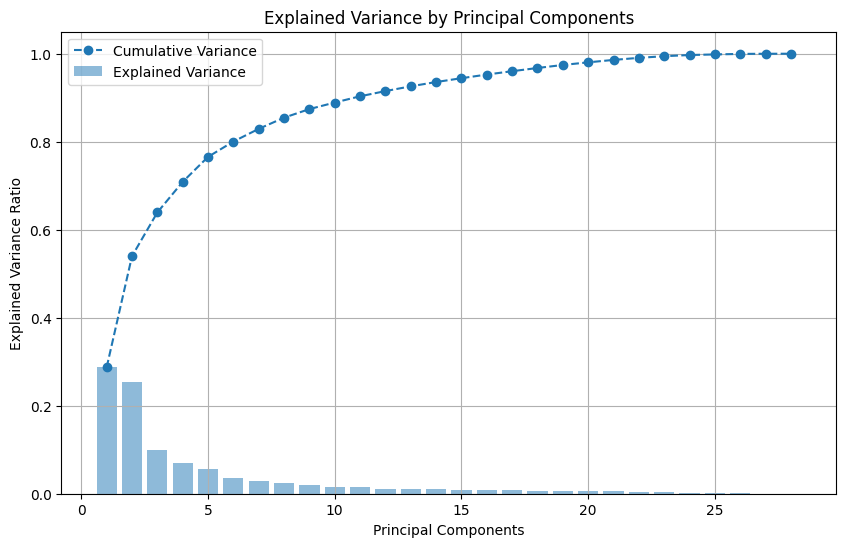

In [34]:
#visualization
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance, marker='o', linestyle='--', label='Cumulative Variance')
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, label='Explained Variance')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Principal Components')
plt.legend()
plt.grid(True)
plt.show()

The bar plot shows that only a few principal components capture the majority of the variance in the data, meaning most of the information in the dataset can be represented with fewer dimensions. This suggests that dimensionality reduction is feasible without losing much information, which can improve computational efficiency and simplify analysis while retaining the dataset's core characteristics.

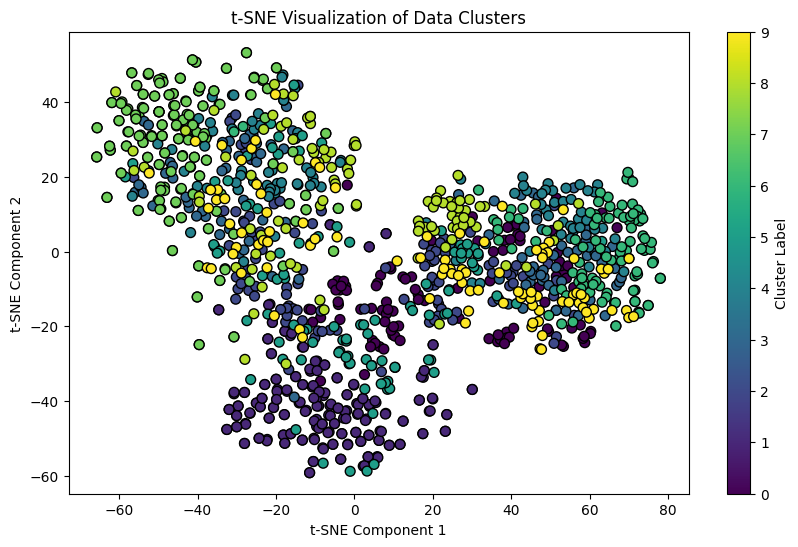

In [ ]:

X = numerical_features.values
y = data['label'].values

# standardize the data important for most dimensionality reduction techniques
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#appply t-SNE for non-linear dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', s=50, edgecolor='k')
plt.colorbar(label='Cluster Label')
plt.title('t-SNE Visualization of Data Clusters')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()